Caro aluno(a) Bernardo,

Nessa disciplina, aprendemos nossos conhecimentos em algoritmos supervisionados, família de algoritmos que é extremamente importante para o dia-a-dia de um cientista de dados. Agora iremos validar nosso conhecimento. 

1. Faça o módulo do Kaggle Intro to Machine Learning:
Comprove a finalização do módulo com um print que contenha data e identificação do aluno. 

    Trabalho com base:

    Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle (https://www.kaggle.com/datasets/rajyellow46/wine-quality):

    Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

2. Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

    Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

4. Com a base escolhida:

    a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

    b)Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
    
        i. a média e desvio da acurácia dos modelos obtidos;
    
        ii. a média e desvio da precisão dos modelos obtidos;
    
        iii. a média e desvio da recall dos modelos obtidos;
        
        iv. a média e desvio do f1-score dos modelos obtidos.

    c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
    
        i. a média e desvio da acurácia dos modelos obtidos;
    
        ii. a média e desvio da precisão dos modelos obtidos;
    
        iii. a média e desvio da recall dos modelos obtidos;
    
        iv. a média e desvio do f1-score dos modelos obtidos.

    d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
        
        i. a média e desvio da acurácia dos modelos obtidos;
    
        ii. a média e desvio da precisão dos modelos obtidos;
    
        iii. a média e desvio da recall dos modelos obtidos;
    
        iv. a média e desvio do f1-score dos modelos obtidos.

5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.


# Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

### 2. Faça o download da base - esta é uma base real, apresentada no artigo: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
#### Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [2]:
# Importando bibliotecas para a análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file = 'aulas/machine_learning/aprendizado_supervisionado_files/winequalityN.csv'
df = pd.read_csv(file)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df_copy = df.copy()

In [4]:
df_copy['opinion'] = 1
df_copy.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [5]:
df_copy.loc[df_copy['quality'] <= 5, 'opinion'] = 0
df_copy

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [6]:
df_copy.drop('quality',axis=1, inplace=True)
df_copy.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [7]:
df_copy['type'].unique()

array(['white', 'red'], dtype=object)

In [8]:
labels, unique = pd.factorize(df_copy['type'])
df_copy['type'] = labels + 1

In [9]:
df_copy

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,1
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Verificando valores nulos

In [10]:
rows_nan = df_copy[df_copy.isna().any(axis=1)]
rows_nan.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
17,1,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1
33,1,6.2,0.12,0.34,NaN,0.045,43.0,117.0,0.9939,3.42,0.51,9.0,1
54,1,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.9930,NaN,0.38,9.1,1
86,1,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,1
98,1,9.8,0.36,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,0


In [11]:
len(rows_nan)

34

In [12]:
len(df_copy)

6497

In [13]:
len(rows_nan)/len(df_copy)

0.005233184546713868

Pelo fato das observações que apresentam algum valor nulo serem bem menor do que o número total de observações e o foco de aplicar modelos de machine learning vamos apenas remover essas obsevações

In [14]:
df_copy = df_copy.loc[df_copy.isna().any(axis=1)==False]
df_copy

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,2,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
6492,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Aplicando os vinhos do tipo Branco tratado a uma variável do DataFrame que utilizaremos para criar os modelos, como solicitado

In [17]:
wine = df_copy.copy()

In [19]:
white_wine = wine.loc[wine['type']==1,:]
white_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


### 3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [20]:
white_wine.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,1.246480,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,0.632988
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.482027
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,0.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,1.000000
max,2.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


Apenas a coluna 'type' é uma variável categórica

In [21]:
white_wine['type'].unique()

array([1], dtype=int64)

Todas as outras variáveis são contínuas

In [22]:
wine.iloc[:,1:-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### 4. Com a base escolhida:

#### a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

In [23]:
# Importando bibliotecas para separar os dados em treino e teste e padroniza-los
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importando bibliotecas para calcular as métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score

Primeiro vamos normalizar todos os dados do dataset e separar em conjuntos de treino e teste

In [24]:
# Separando os dados de entrada do de saída
X_white = white_wine.iloc[:,0:-1]
y_white = white_wine.iloc[:,-1]

In [25]:
# Separando o modelo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.2, random_state=5)

In [26]:
# Normalizando os conjuntos de entrada para que eles fiquem na mesma escala
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Criando uma função que recebe um tipo modelo e printa a média e desvio da validação cruzada calculada para cada métrica dos modelos criados
def cross_val_metrics(model, X=X_train, y=y_train, k_folds=10):
    accuracy_scores = cross_val_score(model, X, y, cv=k_folds, scoring=make_scorer(accuracy_score)) 
    # Apesar da validação cruzada já usar como métrica a acurácia, aqui está como deve ser feito para especificar a métrica
    precision_scores = cross_val_score(model, X, y, cv=k_folds, scoring=make_scorer(precision_score))
    recall_scores = cross_val_score(model, X, y, cv=k_folds, scoring=make_scorer(recall_score))
    f1_scores = cross_val_score(model, X, y, cv=k_folds, scoring=make_scorer(f1_score))
    return print(
        f'''Média da acúracia: {accuracy_scores.mean()}
Desvio padrão da acúracia: {accuracy_scores.std()}

Média da precisão: {precision_scores.mean()}
Desvio padrão da precisão: {precision_scores.std()}

Média do recall: {recall_scores.mean()}
Desvio padrão do recall: {recall_scores.std()}

Média do f1-score: {f1_scores.mean()}
Desvio padrão do f1-score: {f1_scores.std()}
        '''
    )


Agora basta aplicar os modelos

#### b)Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
    
        i. a média e desvio da acurácia dos modelos obtidos;
    
        ii. a média e desvio da precisão dos modelos obtidos;
    
        iii. a média e desvio da recall dos modelos obtidos;
        
        iv. a média e desvio do f1-score dos modelos obtidos.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [30]:
y_hat = LR.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score # Realizando a validação cruzada
scores = cross_val_score(LR, X_train, y_train, cv=10)
scores

array([0.77179487, 0.73333333, 0.74871795, 0.77179487, 0.72820513,
       0.73589744, 0.73521851, 0.76863753, 0.73007712, 0.73521851])

In [32]:
cross_val_metrics(LR)

Média da acúracia: 0.7458895260694747
Desvio padrão da acúracia: 0.017075294343384815

Média da precisão: 0.7718718134018883
Desvio padrão da precisão: 0.01636548828146331

Média do recall: 0.8780323730323731
Desvio padrão do recall: 0.02202346826231165

Média do f1-score: 0.8212714076622643
Desvio padrão do f1-score: 0.011969406797728455
        


#### c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

    i. a média e desvio da acurácia dos modelos obtidos;

    ii. a média e desvio da precisão dos modelos obtidos;

    iii. a média e desvio da recall dos modelos obtidos;

    iv. a média e desvio do f1-score dos modelos obtidos.

In [33]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
dTree.fit(X_train, y_train, )

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_hat = dTree.predict(X_test)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [35]:
scores = cross_val_score(dTree, X_train, y_train, cv=10)
scores

array([0.77435897, 0.77948718, 0.76153846, 0.77435897, 0.7974359 ,
       0.75384615, 0.7840617 , 0.76349614, 0.73521851, 0.76092545])

In [36]:
cross_val_metrics(dTree)

Média da acúracia: 0.7707810955111726
Desvio padrão da acúracia: 0.02128492626145109

Média da precisão: 0.8225606116694226
Desvio padrão da precisão: 0.012271913539539055

Média do recall: 0.8267092367092367
Desvio padrão do recall: 0.02037713843129173

Média do f1-score: 0.8228500109353714
Desvio padrão do f1-score: 0.017169212159715896
        


#### d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

    i. a média e desvio da acurácia dos modelos obtidos;

    ii. a média e desvio da precisão dos modelos obtidos;

    iii. a média e desvio da recall dos modelos obtidos;

    iv. a média e desvio do f1-score dos modelos obtidos.

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [38]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

array([0.81282051, 0.77692308, 0.79230769, 0.8       , 0.77179487,
       0.74871795, 0.7840617 , 0.77377892, 0.79691517, 0.79691517])

In [39]:
cross_val_metrics(clf)

Média da acúracia: 0.7854235053720915
Desvio padrão da acúracia: 0.017370447695468222

Média da precisão: 0.8099361110964616
Desvio padrão da precisão: 0.017616444357965468

Média do recall: 0.8857499257499256
Desvio padrão do recall: 0.01775396529738222

Média do f1-score: 0.8459436820770939
Desvio padrão do f1-score: 0.011981381213459473
        


### 5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

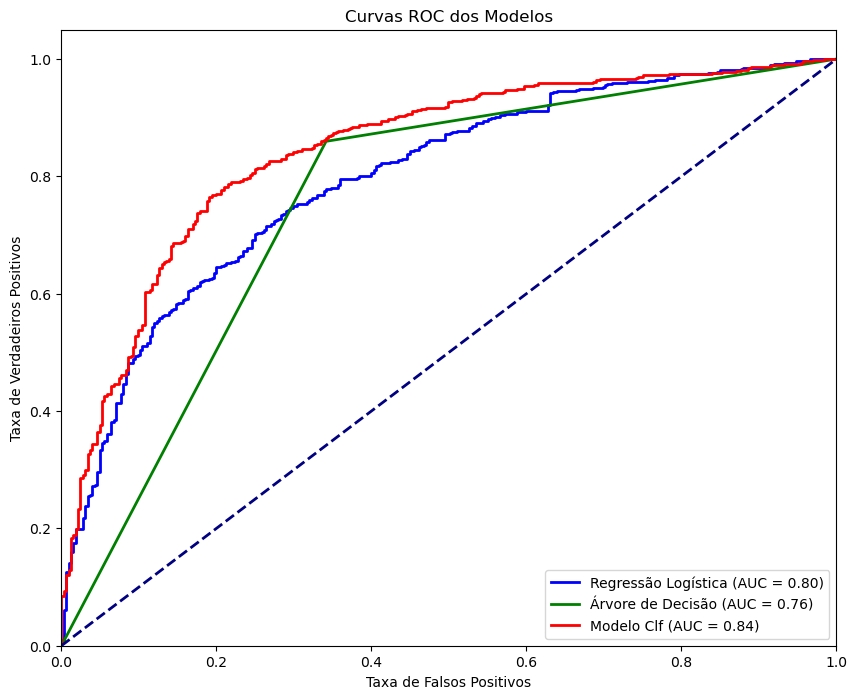

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular as curvas ROC e AUC para cada modelo
modelos = [LR, dTree, clf]
nomes_modelos = ['Regressão Logística', 'Árvore de Decisão', 'Modelo Clf']
cores = ['blue', 'green', 'red']

plt.figure(figsize=(10, 8))

for modelo, nome, cor in zip(modelos, nomes_modelos, cores):
    # Previsões de probabilidade para a classe positiva
    probas = modelo.predict_proba(X_test)[:, 1]
    # Calcular ROC
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    # Calcular AUC
    roc_auc = auc(fpr, tpr)
    # Plotar a curva ROC
    plt.plot(fpr, tpr, color=cor, lw=2, label=f'{nome} (AUC = {roc_auc:.2f})')

# Adicionando detalhes ao gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC dos Modelos')
plt.legend(loc="lower right")
plt.show()


O modelo 'clf' apresenta a maior AUC, com um valor de 0.85. Isso indica que, em geral, este modelo tem a melhor capacidade de discriminação entre as classes positivas e negativas.

O modelo de Regressão Logística vem em seguida, com uma AUC de 0.84, o que também é uma boa medida de desempenho.

A Árvore de Decisão tem a AUC mais baixa entre os três modelos, com um valor de 0.76.

Dado que o modelo 'clf' tem a curva ROC mais próxima do canto superior esquerdo e a maior AUC, ele seria a escolha recomendada para uma operação eventual, assumindo que as curvas foram calculadas de maneira correta e que os dados de teste são representativos da população geral a que o modelo se destina.

### 6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

In [44]:
X_red = wine.loc[wine['type'] == 2].iloc[:,0:-1]
y_red = wine.loc[wine['type'] == 2].iloc[:,-1]

In [45]:
# Padronizando os dados por completos do dataset e atribuindo a uma variavel
X_red = scaler.transform(X_red)

In [46]:
y_hat = clf.predict(X_red)
y_hat

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [47]:
print("Aplicando modelo nos dados de treino e observando as métricas:")
cross_val_metrics(clf)
print()
print("Agora aplicando modelo nos dados de vinho tintos(vermelho) e observando as métricas:")
cross_val_metrics(clf, X=X_red, y=y_red)

Aplicando modelo nos dados de treino e observando as métricas:
Média da acúracia: 0.7854235053720915
Desvio padrão da acúracia: 0.017370447695468222

Média da precisão: 0.8099361110964616
Desvio padrão da precisão: 0.017616444357965468

Média do recall: 0.8857499257499256
Desvio padrão do recall: 0.01775396529738222

Média do f1-score: 0.8459436820770939
Desvio padrão do f1-score: 0.011981381213459473
        

Agora aplicando modelo nos dados de vinho tintos(vermelho) e observando as métricas:
Média da acúracia: 0.7332350628930817
Desvio padrão da acúracia: 0.0705829616292468

Média da precisão: 0.7620891684213127
Desvio padrão da precisão: 0.05902541342058799

Média do recall: 0.7355540355677155
Desvio padrão do recall: 0.14244967256870575

Média do f1-score: 0.7398410644351384
Desvio padrão do f1-score: 0.0906719901523645
        
